In [2]:
import pandas as pd
import numpy as np

In [3]:
cr=pd.read_csv('creditriskforbankassets.csv',encoding='latin-1')

/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cr.columns

Index(['NSA', 'LEI_Code', 'Item', 'Label', 'Period', 'Portfolio', 'Country',
       'Country_rank', 'Exposure', 'Status', 'Perf_Status', 'Amount',
       'footnote'],
      dtype='object')

In [5]:
cr=cr[cr['Label'].str.contains('Original')]

In [6]:
cr=cr.drop(['footnote','Item'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
cr['Period']= label_encoder.fit_transform(cr['Period'])
cr['Period'].unique()

array([0, 1, 2, 3])

In [9]:
cr['NSA']=cr['NSA'].astype(object)

In [10]:
cr['Country']=cr['Country'].astype(object)

In [11]:
cr['Perf_Status']=cr['Perf_Status'].astype(object)

In [12]:
cr['Amount'] = cr['Amount'].str.replace(',', '')

In [13]:
cr['Amount'] = cr['Amount'].astype(float)

In [14]:
cr['Period']=cr['Period'].astype(object)

In [15]:
cr['Portfolio']=cr['Portfolio'].astype(object)

In [16]:
cr['Status']=cr['Status'].astype(object)

In [17]:
cr['Exposure']=cr['Exposure'].astype(object)

In [18]:
cr.shape

(146257, 11)

In [19]:
cr.dtypes

NSA              object
LEI_Code         object
Label            object
Period           object
Portfolio        object
Country          object
Country_rank      int64
Exposure         object
Status           object
Perf_Status      object
Amount          float64
dtype: object

In [20]:
cr.isnull().sum()

NSA             0
LEI_Code        0
Label           0
Period          0
Portfolio       0
Country         0
Country_rank    0
Exposure        0
Status          0
Perf_Status     0
Amount          0
dtype: int64

In [21]:
import pandas as pd

In [22]:
df = pd.read_excel('bank_capital_ratio.xlsx')

In [23]:
df=df.rename({'BANK' : 'Bank Name'},axis=1)

In [24]:
bl=pd.read_excel('TR_Metadata.xlsx',sheet_name='Bank list',skiprows=1)
bl=bl[['LEI Code','Name']]
bl.head(2)

,LEI Code,Name
0,529900IZ8TASAYR3A694,Sberbank Europe AG
1,529900S9YO2JHTIIDG38,BAWAG Group AG


In [25]:
bl=bl.rename({'LEI Code':'LEI_Code'},axis=1)

In [26]:
cr=cr.merge(bl,on='LEI_Code',how='left')

In [27]:
df = pd.read_excel('bank_capital_ratio.xlsx')

In [28]:
df=df.rename({'BANK' : 'Bank Name'},axis=1)     

In [29]:
cr.head()

,NSA,LEI_Code,Label,Period,Portfolio,Country,Country_rank,Exposure,Status,Perf_Status,Amount,Name
0,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,103,0,0,653.6443,DekaBank Deutsche Girozentrale
1,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,203,0,0,21893.9301,DekaBank Deutsche Girozentrale
2,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,303,0,0,28318.6905,DekaBank Deutsche Girozentrale
3,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,404,0,0,0.0000,DekaBank Deutsche Girozentrale
4,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,606,0,0,265.9589,DekaBank Deutsche Girozentrale


In [30]:
df1=df[['Bank Name','Q3-2018']]
df2=df[['Bank Name','Q4-2018']]
df3=df[['Bank Name','Q1-2019']]
df4=df[['Bank Name','Q2-2019']]

df1=df1.rename(columns={'Q3-2018':'Bank Capital Ratio'})
df2=df2.rename(columns={'Q4-2018':'Bank Capital Ratio'})
df3=df3.rename(columns={'Q1-2019':'Bank Capital Ratio'})
df4=df4.rename(columns={'Q2-2019':'Bank Capital Ratio'})

df1['Period']=0
df2['Period']=1
df3['Period']=2
df4['Period']=3
df=pd.concat([df1,df2,df3,df4],axis=0)
df.head()

KeyError: "['Q3-2018'] not in index"

In [31]:
cr=cr.rename({'Name' : 'Bank Name'},axis=1) 

In [32]:
cr.head()

,NSA,LEI_Code,Label,Period,Portfolio,Country,Country_rank,Exposure,Status,Perf_Status,Amount,Bank Name
0,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,103,0,0,653.6443,DekaBank Deutsche Girozentrale
1,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,203,0,0,21893.9301,DekaBank Deutsche Girozentrale
2,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,303,0,0,28318.6905,DekaBank Deutsche Girozentrale
3,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,404,0,0,0.0000,DekaBank Deutsche Girozentrale
4,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,606,0,0,265.9589,DekaBank Deutsche Girozentrale


In [33]:
cr=pd.merge(cr,df, how='left', on =['Bank Name','Period'])

In [34]:
cr.head()

,NSA,LEI_Code,Label,Period,Portfolio,Country,Country_rank,Exposure,Status,Perf_Status,Amount,Bank Name,Bank Capital Ratio
0,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,103,0,0,653.6443,DekaBank Deutsche Girozentrale,21.39
1,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,203,0,0,21893.9301,DekaBank Deutsche Girozentrale,21.39
2,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,303,0,0,28318.6905,DekaBank Deutsche Girozentrale,21.39
3,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,404,0,0,0.0000,DekaBank Deutsche Girozentrale,21.39
4,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,606,0,0,265.9589,DekaBank Deutsche Girozentrale,21.39


In [35]:
lr=pd.read_excel('LEVERAGE_RATIO.xlsx',encoding='latin-1')

In [36]:
lr=lr.rename(columns={'BANK':'Bank Name'})

In [37]:
lr1=lr[['Bank Name','Q3-2018']]
lr2=lr[['Bank Name','Q4-2018']]
lr3=lr[['Bank Name','Q1-2019']]
lr4=lr[['Bank Name','Q2-2019']]

In [38]:
lr1=lr1.rename(columns={'Q3-2018':'TLE'})
lr2=lr2.rename(columns={'Q4-2018':'TLE'})
lr3=lr3.rename(columns={'Q1-2019':'TLE'})
lr4=lr4.rename(columns={'Q2-2019':'TLE'})

In [39]:
lr1['Period']=0

In [40]:
lr2['Period']=1
lr3['Period']=2
lr4['Period']=3

In [41]:
lrl=pd.concat([lr1,lr2,lr3,lr4],axis=0)

In [42]:
cr=pd.merge(cr,lrl, how='left', on =['Bank Name','Period'])

In [43]:
cr=cr.rename(columns={'Amount':'Credit risk amount'})

In [44]:
mrk=pd.read_csv('tr_mrk.csv',encoding='latin-1')
mrk=mrk[(mrk['Item']==1920401)]
mrk=mrk[(mrk['Portfolio']==1)]
label_encoder = LabelEncoder()
mrk['Period']= label_encoder.fit_transform(mrk['Period'])
mrk['Period'].unique()

array([0, 1, 2, 3])

In [45]:
mrk=mrk[['LEI_Code','Period','Amount']]

In [46]:
cr=pd.merge(cr,mrk, how='left', on =['LEI_Code','Period'])

In [47]:
cr=cr.rename(columns={'Amount':'Market risk amount'})

In [48]:
cr.head(1)

,NSA,LEI_Code,Label,Period,Portfolio,Country,Country_rank,Exposure,Status,Perf_Status,Credit risk amount,Bank Name,Bank Capital Ratio,TLE,Market risk amount
0,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,0,103,0,0,653.6443,DekaBank Deutsche Girozentrale,21.39,111900.166309,"3,090.4000"


In [63]:
ns=pd.read_excel('TR_Metadata.xlsx',sheet_name='Country',skiprows=1)

In [64]:
ns.head(2)

,Unnamed: 0,Country,Label,ISO_code
0,NaN,NaN,NaN,NaN
1,NaN,0.0,Total / No breakdown,00


In [65]:
ns=ns.rename(columns={'ISO_code':'NSA','Label':'NSA Name'})

In [66]:
ns=ns.drop(0,axis=0)
ns=ns.drop('Unnamed: 0',axis=1)

In [67]:
ns=ns.drop('Country',axis=1)

In [68]:
cr=pd.merge(cr,ns, how='left', on =['NSA'])

In [69]:
cr['NSA Name']=cr['NSA Name'].replace(np.nan,'Others')

In [73]:
cn=pd.read_excel('TR_Metadata.xlsx',sheet_name='Country',skiprows=1)

In [74]:
cn=cn.drop(0,axis=0)
cn=cn.drop('Unnamed: 0',axis=1)

In [75]:
cn=cn.drop('ISO_code',axis=1)

In [76]:
cn=cn.rename(columns={'Label':'Country Name'})

In [77]:
cr=pd.merge(cr,cn, how='left', on =['Country'])

In [78]:
cr=cr.drop('Country',axis=1)

In [79]:
ex=pd.read_excel('TR_Metadata.xlsx',sheet_name='Exposure',skiprows=2)

In [80]:
ex.head(2)

,Unnamed: 0,Unnamed: 1,Exposure,Label
0,NaN,NaN,NaN,NaN
1,NaN,NaN,0.0,Total / No breakdown


In [81]:
ex=ex.drop(0,axis=0)

In [82]:
ex.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Exposure', 'Label'], dtype='object')

In [83]:
ex=ex.drop(['Unnamed: 0', 'Unnamed: 1'],axis=1)

In [84]:
ex=ex.rename(columns={'Label':'Lended Institution'})

In [85]:
cr=pd.merge(cr,ex, how='left', on =['Exposure'])

In [86]:
cr['Market risk amount']=cr['Market risk amount'].str.replace(',','')

In [87]:
cr['Market risk amount']=cr['Market risk amount'].astype(float)

In [88]:
cr.to_csv('Capstone_eda.csv')

In [89]:
cr.head(1)

,NSA,LEI_Code,Label,Period,Portfolio,Country_rank,Exposure,Status,Perf_Status,Credit risk amount,Bank Name,Bank Capital Ratio,TLE,Market risk amount,NSA Name,Country Name,Lended Institution
0,DE,0W2PZJM8XOY22M4GG883,Original Exposure - by exposure class (SA_and_...,0,2,0,103,0,0,653.6443,DekaBank Deutsche Girozentrale,21.39,111900.166309,3090.4,Germany,Total / No breakdown,Central governments or central banks


In [90]:
cr=cr.drop(['NSA','LEI_Code','Exposure'],axis=1)

In [91]:
cr.Country_rank=cr.Country_rank.astype(int)
cr.dtypes
cr.isnull().sum()

Label                     0
Period                    0
Portfolio                 0
Country_rank              0
Status                    0
Perf_Status               0
Credit risk amount        0
Bank Name                 0
Bank Capital Ratio    26670
TLE                   27389
Market risk amount        0
NSA Name                  0
Country Name              0
Lended Institution        0
dtype: int64

In [92]:
cr['TLE'] = (cr['TLE'] - cr['TLE'].mean())/cr['TLE'].std(ddof=0)
cr['Market risk amount'] = (cr['Market risk amount'] - cr['Market risk amount'].mean())/cr['Market risk amount'].std(ddof=0)
cr['Bank Capital Ratio'] = (cr['Bank Capital Ratio'] - cr['Bank Capital Ratio'].mean())/cr['Bank Capital Ratio'].std(ddof=0)
cr['Country_rank'] = (cr['Country_rank'] - cr['Country_rank'].mean())/cr['Country_rank'].std(ddof=0)

In [93]:
import category_encoders as ce
encoder = ce.BinaryEncoder()
cr=encoder.fit_transform(cr)

In [94]:
cr.columns

Index(['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Period_0',
       'Period_1', 'Period_2', 'Portfolio_0', 'Portfolio_1', 'Country_rank',
       'Status_0', 'Status_1', 'Perf_Status_0', 'Credit risk amount',
       'Bank Name_0', 'Bank Name_1', 'Bank Name_2', 'Bank Name_3',
       'Bank Name_4', 'Bank Name_5', 'Bank Name_6', 'Bank Name_7',
       'Bank Name_8', 'Bank Capital Ratio', 'TLE', 'Market risk amount',
       'NSA Name_0', 'NSA Name_1', 'NSA Name_2', 'NSA Name_3', 'NSA Name_4',
       'NSA Name_5', 'Country Name_0', 'Country Name_1', 'Country Name_2',
       'Country Name_3', 'Country Name_4', 'Country Name_5', 'Country Name_6',
       'Country Name_7', 'Lended Institution_0', 'Lended Institution_1',
       'Lended Institution_2', 'Lended Institution_3', 'Lended Institution_4',
       'Lended Institution_5'],
      dtype='object')

In [95]:
cr=cr.dropna()

In [83]:
cr.to_csv('online.csv')

In [83]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters,n_init = 15, random_state=2)
  clusters.fit(cr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,5.996115e+13
1,2,2.442292e+13
2,3,1.339608e+13
3,4,7.918681e+12
4,5,4.985723e+12
5,6,3.460322e+12
6,7,2.642349e+12
7,8,1.914597e+12
8,9,1.415261e+12
9,10,1.091012e+12


In [84]:
import matplotlib.pyplot as plt

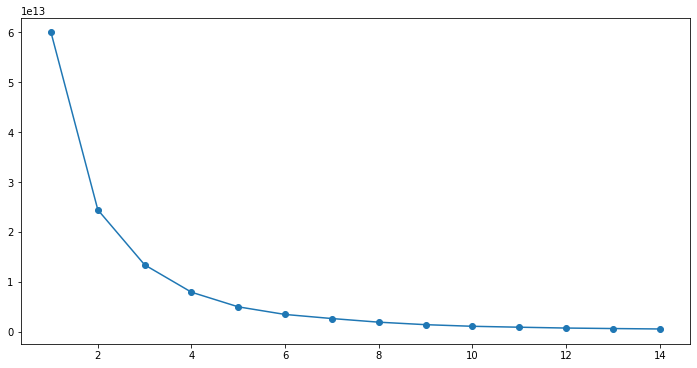

In [85]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(cr, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=100,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.9812401676814256


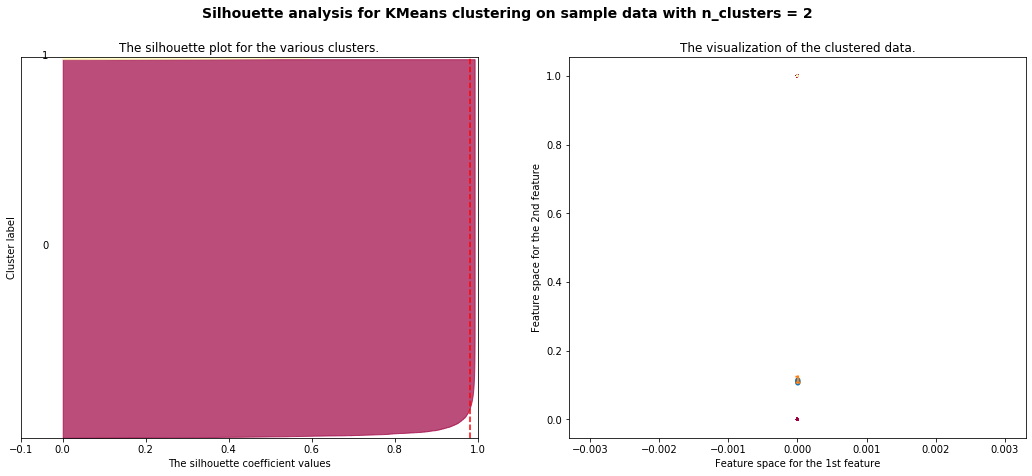

For n_clusters = 3 The average silhouette_score is : 0.9723015793755502


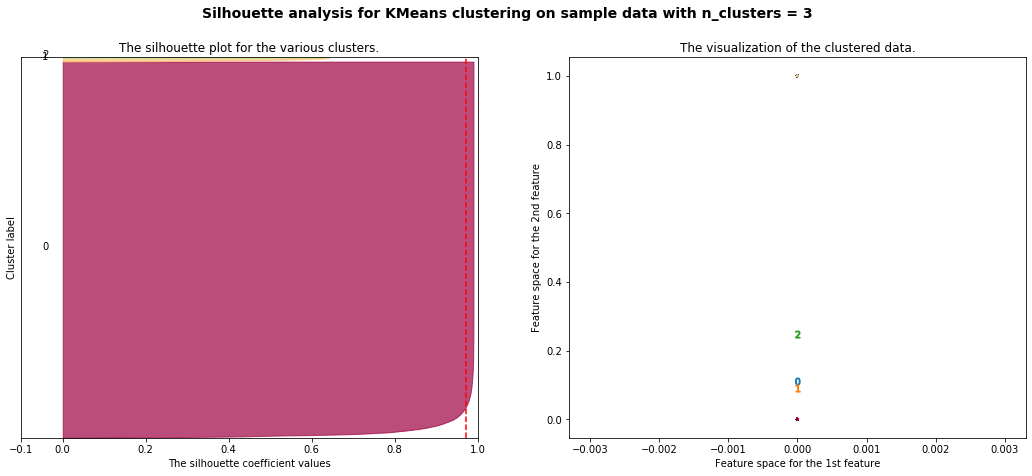

For n_clusters = 4 The average silhouette_score is : 0.9674333144499649


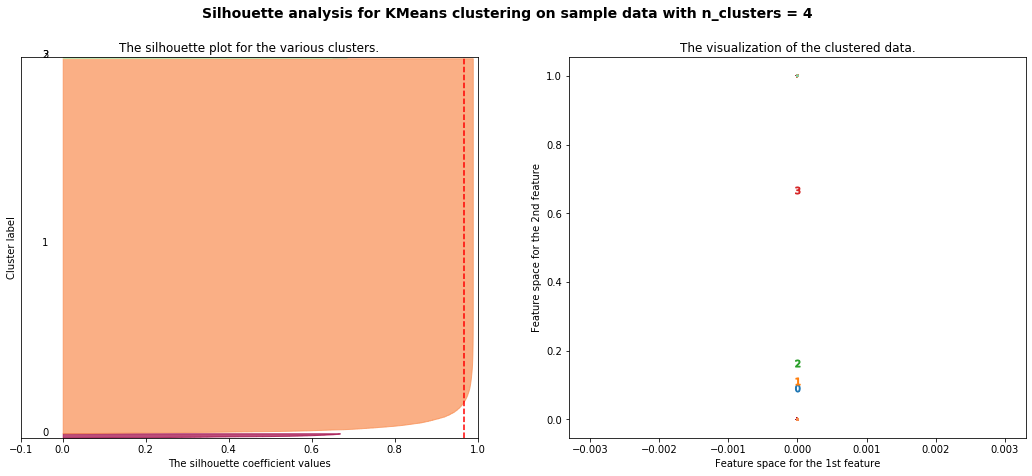

For n_clusters = 5 The average silhouette_score is : 0.9605394245150467


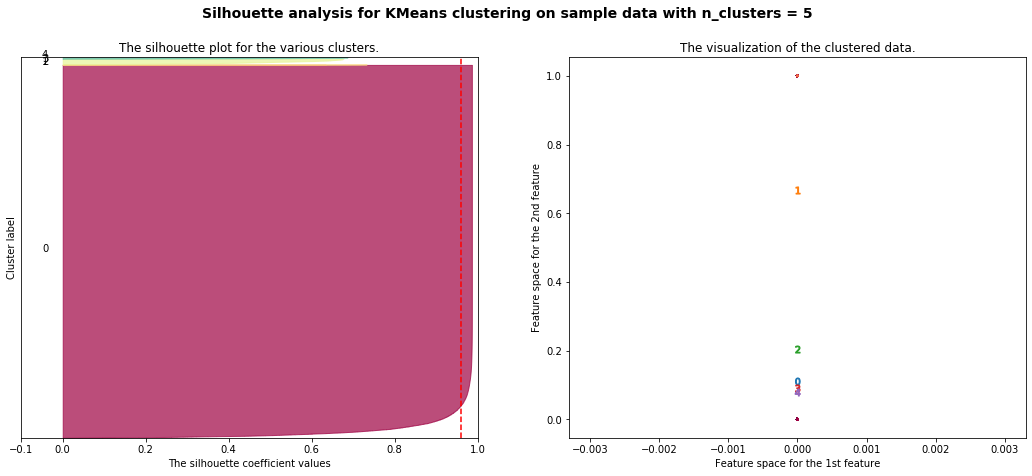

For n_clusters = 6 The average silhouette_score is : 0.9431686129862051


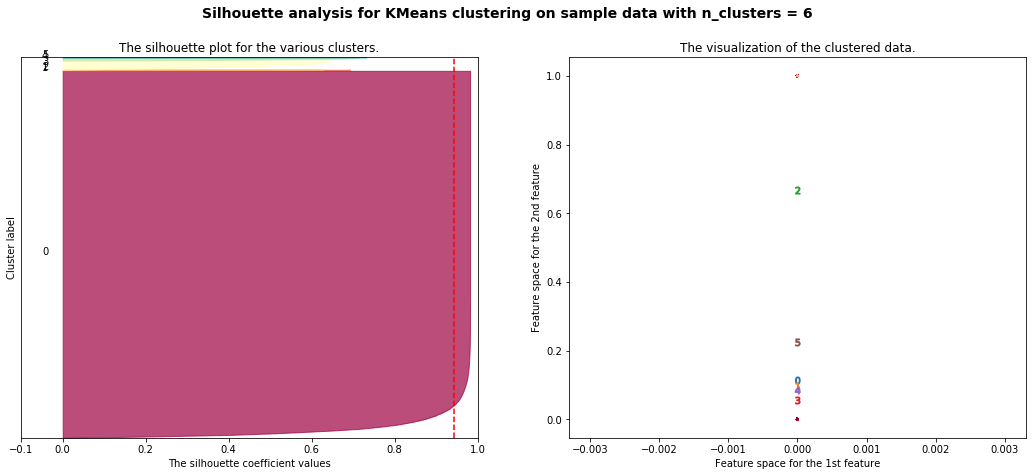

For n_clusters = 7 The average silhouette_score is : 0.9431830133073977


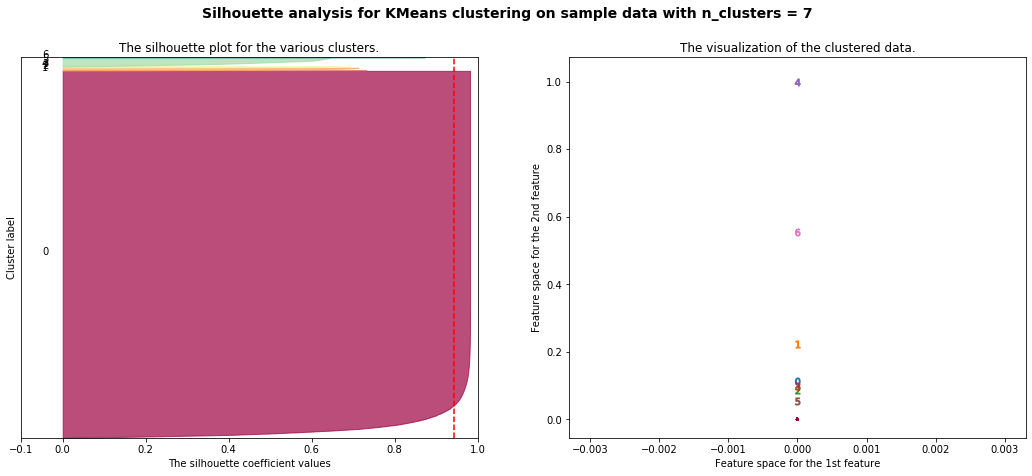

For n_clusters = 8 The average silhouette_score is : 0.9316501047358926


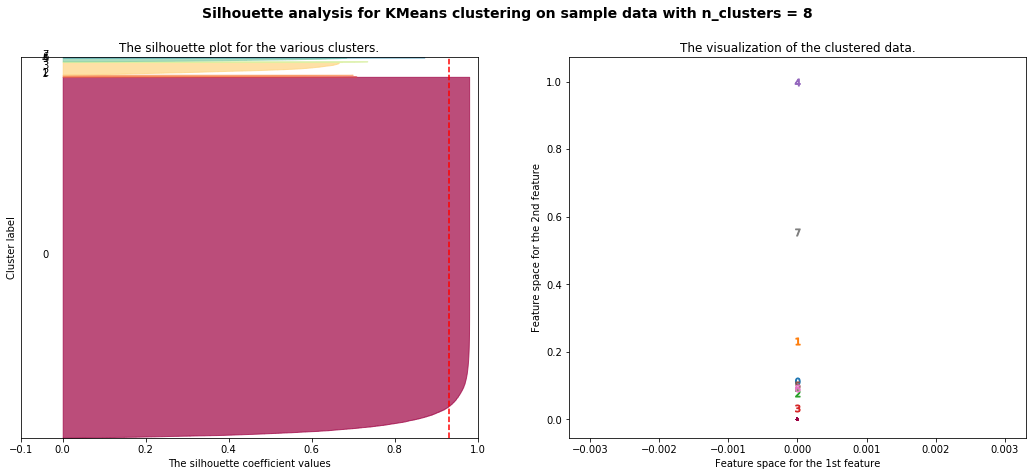

For n_clusters = 9 The average silhouette_score is : 0.92934538034555


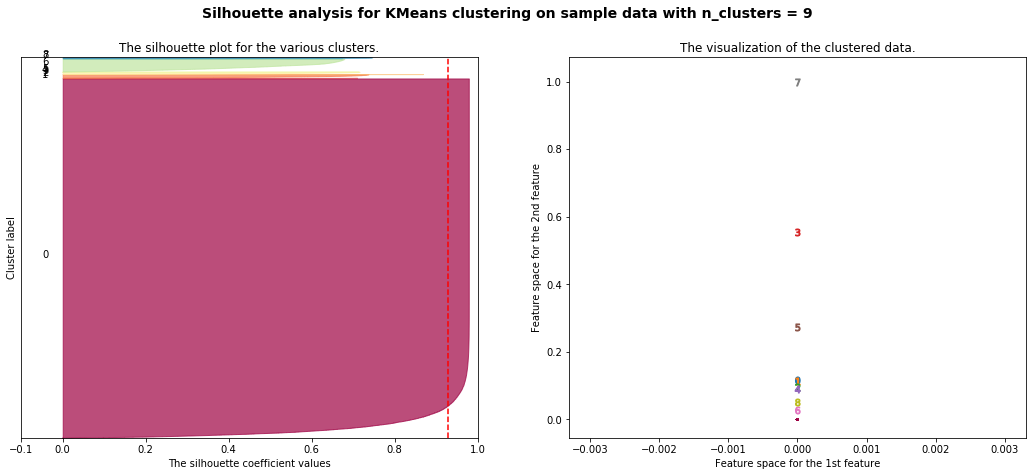

For n_clusters = 10 The average silhouette_score is : 0.9294145616185283


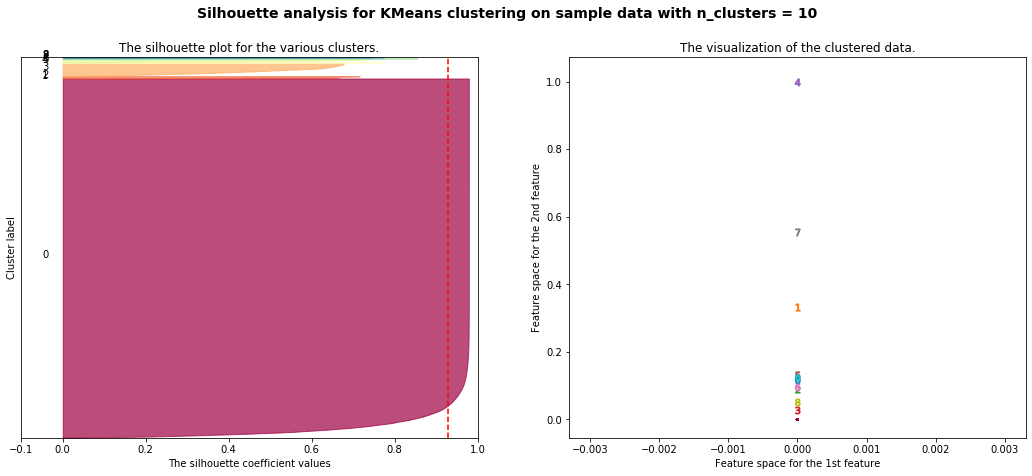

For n_clusters = 11 The average silhouette_score is : 0.92617001837973


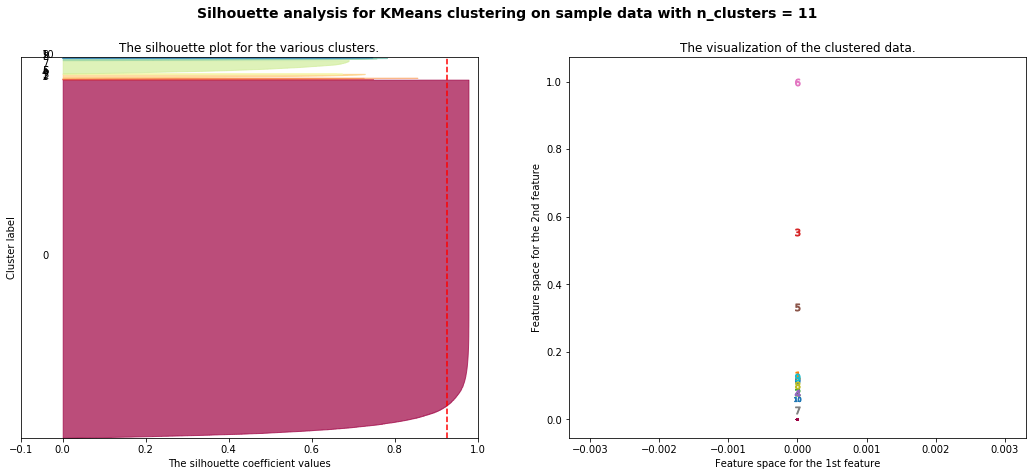

For n_clusters = 12 The average silhouette_score is : 0.9133145034801685


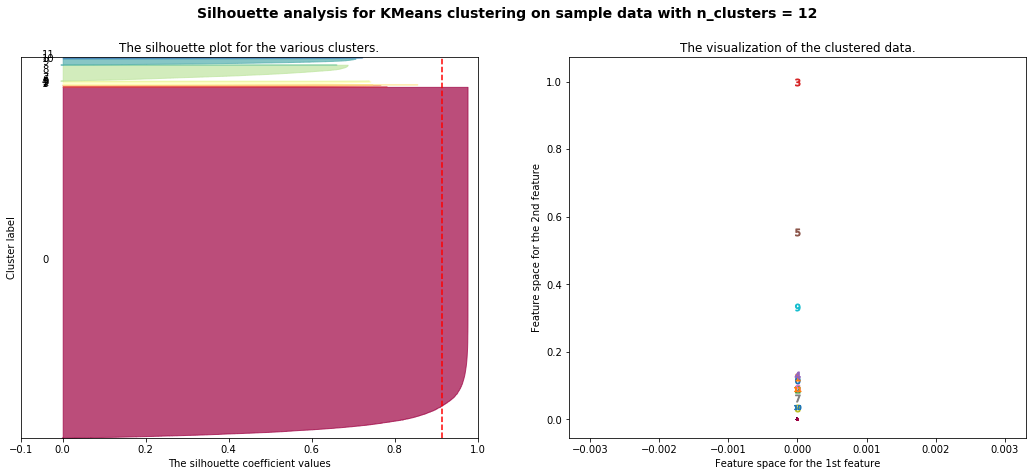

For n_clusters = 13 The average silhouette_score is : 0.9133124423815175


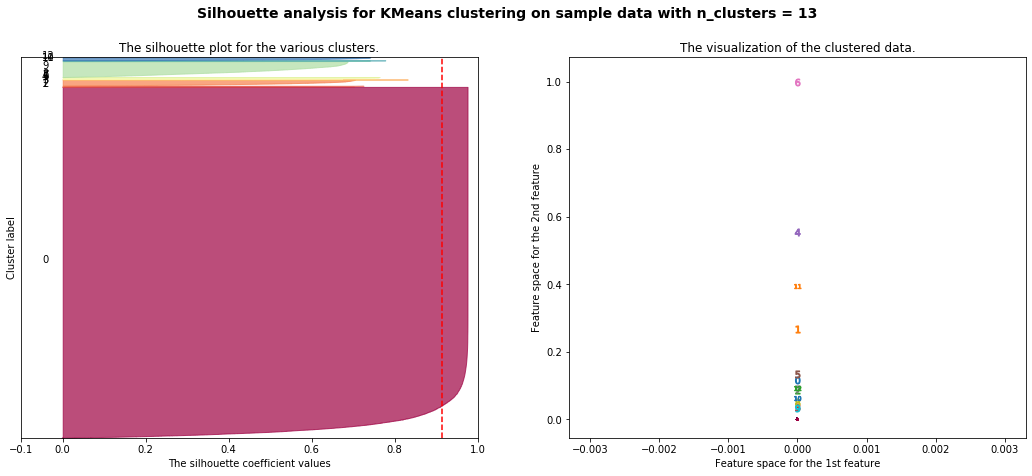

For n_clusters = 14 The average silhouette_score is : 0.9133088667448045


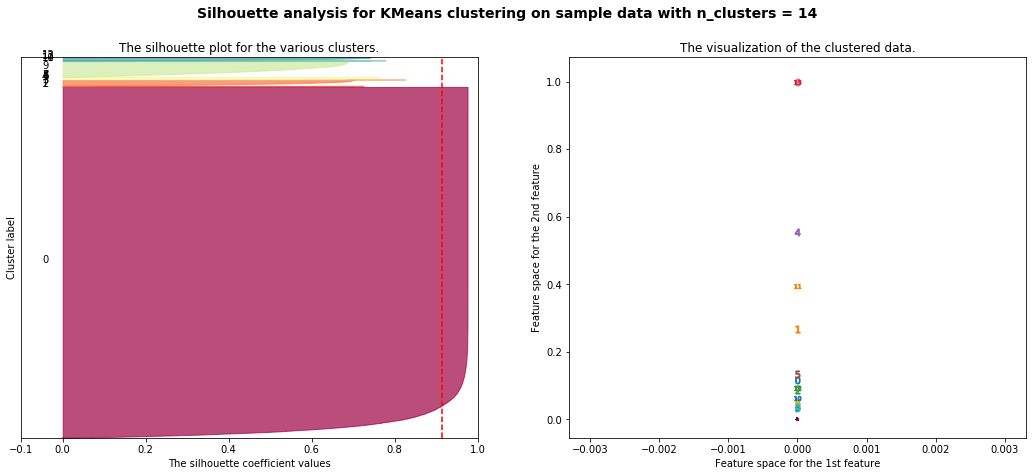

For n_clusters = 15 The average silhouette_score is : 0.9035861680021468


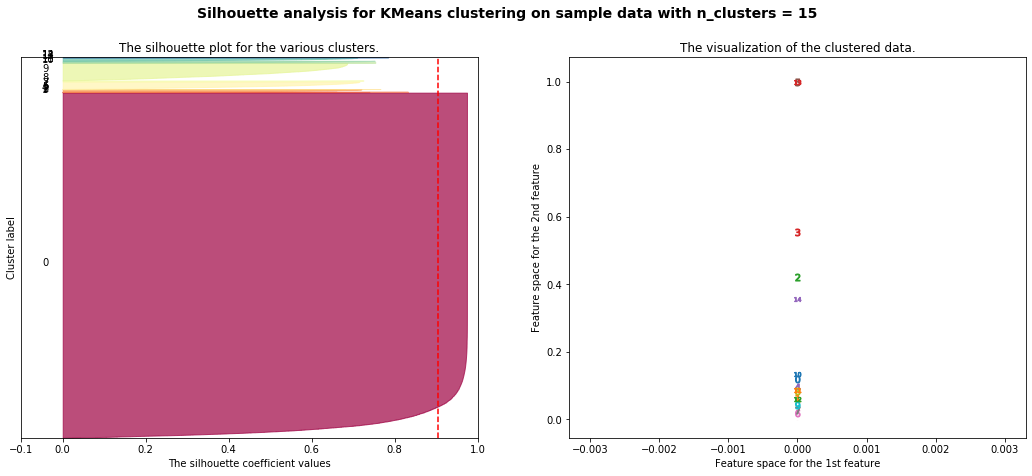

In [203]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=cr.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [96]:
from sklearn.cluster import KMeans

In [97]:
km = KMeans(n_clusters=3,n_init = 15, random_state=2)
km.fit(cr)
cdlb = pd.DataFrame(km.labels_ , columns = list(['labels']))
cdlb['labels'] = cdlb['labels'].astype('category')
cd_pcap1 = cr.join(cdlb)
cdcls = cd_pcap1.groupby(['labels'])
cd0=cdcls.get_group(0)
cd1=cdcls.get_group(1)
cd2=cdcls.get_group(2)
cdf = pd.concat([cd0,cd1,cd2])
cdf.head()

,Label_0,Label_1,Label_2,Label_3,Label_4,Period_0,Period_1,Period_2,Portfolio_0,Portfolio_1,...,Country Name_5,Country Name_6,Country Name_7,Lended Institution_0,Lended Institution_1,Lended Institution_2,Lended Institution_3,Lended Institution_4,Lended Institution_5,labels
0,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [98]:
import seaborn as sns

In [99]:
cdf0=cdf[cdf['labels']==0]
cdf1=cdf[cdf['labels']==1]
cdf2=cdf[cdf['labels']==2]

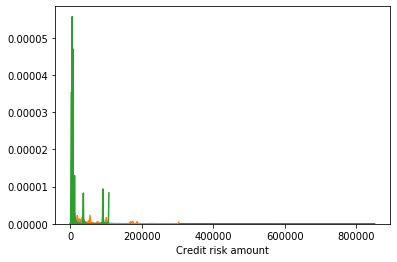

In [100]:
sns.distplot(cdf0['Credit risk amount'],hist=False)
sns.distplot(cdf1['Credit risk amount'],hist=False)
sns.distplot(cdf2['Credit risk amount'],hist=False)

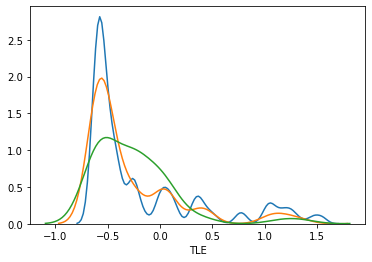

In [101]:
sns.distplot(cdf0['TLE'],hist=False)
sns.distplot(cdf1['TLE'],hist=False)
sns.distplot(cdf2['TLE'],hist=False)

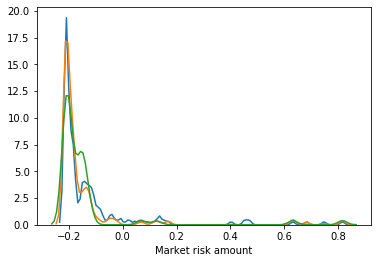

In [102]:
sns.distplot(cdf0['Market risk amount'],hist=False)
sns.distplot(cdf1['Market risk amount'],hist=False)
sns.distplot(cdf2['Market risk amount'],hist=False)

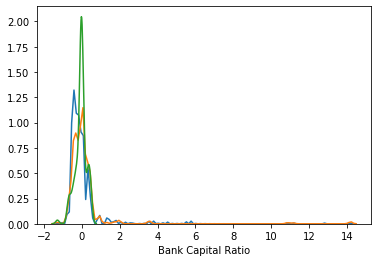

In [103]:
sns.distplot(cdf0['Bank Capital Ratio'],hist=False)
sns.distplot(cdf1['Bank Capital Ratio'],hist=False)
sns.distplot(cdf2['Bank Capital Ratio'],hist=False)

In [104]:
cdf.to_csv('EDA_withlabels.csv')

In [105]:
cdf.head()

,Label_0,Label_1,Label_2,Label_3,Label_4,Period_0,Period_1,Period_2,Portfolio_0,Portfolio_1,...,Country Name_5,Country Name_6,Country Name_7,Lended Institution_0,Lended Institution_1,Lended Institution_2,Lended Institution_3,Lended Institution_4,Lended Institution_5,labels
0,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


# Agglomerative clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering 

In [27]:
model2 = AgglomerativeClustering(n_clusters=3)
model2.fit(cr)

# 3D scatter plot of clusters

In [94]:
from mpl_toolkits.mplot3d import Axes3D
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

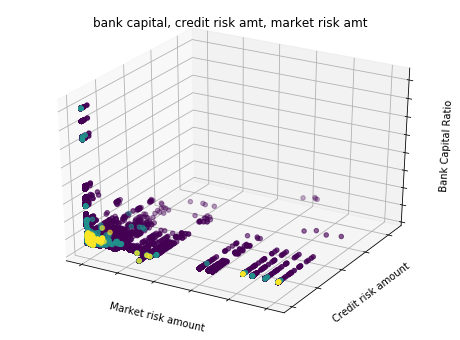

In [96]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cdf['Market risk amount'],cdf['Credit risk amount'],cdf['Bank Capital Ratio'], c=cdf['labels'])

ax.set_title("bank capital, credit risk amt, market risk amt")
ax.set_xlabel("Market risk amount")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Credit risk amount")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Bank Capital Ratio")
ax.w_zaxis.set_ticklabels([])
plt.show()

# to get names for label encoded columns

In [102]:
final = encoder.inverse_transform(cr)

In [98]:
cr.columns

Index(['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Period_0',
       'Period_1', 'Period_2', 'Portfolio_0', 'Portfolio_1', 'Country_rank',
       'Status_0', 'Status_1', 'Perf_Status_0', 'Credit risk amount',
       'Bank Name_0', 'Bank Name_1', 'Bank Name_2', 'Bank Name_3',
       'Bank Name_4', 'Bank Name_5', 'Bank Name_6', 'Bank Name_7',
       'Bank Name_8', 'Bank Capital Ratio', 'TLE', 'Market risk amount',
       'NSA Name_0', 'NSA Name_1', 'NSA Name_2', 'NSA Name_3', 'NSA Name_4',
       'NSA Name_5', 'Country Name_0', 'Country Name_1', 'Country Name_2',
       'Country Name_3', 'Country Name_4', 'Country Name_5', 'Country Name_6',
       'Country Name_7', 'Lended Institution_0', 'Lended Institution_1',
       'Lended Institution_2', 'Lended Institution_3', 'Lended Institution_4',
       'Lended Institution_5'],
      dtype='object')

In [186]:
temp2 = temp

In [187]:
temp2.dropna(inplace=True)

In [188]:
encoder2 = ce.BinaryEncoder()
temp2=encoder2.fit_transform(temp2)

In [215]:
km = KMeans(n_clusters=3,n_init = 15, random_state=2)
km.fit(temp2)
cdlb = pd.DataFrame(km.labels_ , columns = list(['labels']))
cdlb['labels'] = cdlb['labels'].astype('category')
cd_pcap1 = temp2.join(cdlb)
cdcls = cd_pcap1.groupby(['labels'])
cd0=cdcls.get_group(0)
cd1=cdcls.get_group(1)
cd2=cdcls.get_group(2)
cdf2 = pd.concat([cd0,cd1,cd2])
cdf2.head()

,Label_0,Label_1,Label_2,Label_3,Label_4,Period_0,Period_1,Period_2,Portfolio_0,Portfolio_1,...,Country Name_5,Country Name_6,Country Name_7,Lended Institution_0,Lended Institution_1,Lended Institution_2,Lended Institution_3,Lended Institution_4,Lended Institution_5,labels
0,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [220]:
temp2['labels'] = cd_pcap1['labels']

In [221]:
temp2.shape

(118868, 15)

In [223]:
temp2.to_csv('EDA_withlabel2.csv')

In [229]:
cd_pcap1[['Bank Capital Ratio','Credit risk amount','TLE','Market risk amount']].tail()

,Bank Capital Ratio,Credit risk amount,TLE,Market risk amount
146252,-0.026101,0.0,3.914394,8.241476
146253,-0.026101,0.0,3.914394,8.241476
146254,-0.026101,0.0,3.914394,8.241476
146255,-0.026101,0.0,3.914394,8.241476
146256,-0.026101,0.0,3.914394,8.241476


In [230]:
temp.tail()

,Label,Period,Portfolio,Country_rank,Status,Perf_Status,Credit risk amount,Bank Name,Bank Capital Ratio,TLE,Market risk amount,NSA Name,Country Name,Lended Institution
146252,Original Exposure - SME - by exposure class (S...,3,1,1.563167,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Luxembourg,Retail - SME
146253,Original Exposure - SME - by exposure class (S...,3,1,1.563167,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Luxembourg,Secured by mortgages on immovable property - SME
146254,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Corporates - SME
146255,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Retail - SME
146256,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Secured by mortgages on immovable property - SME


In [231]:
temp2.tail()

,Label,Period,Portfolio,Country_rank,Status,Perf_Status,Credit risk amount,Bank Name,Bank Capital Ratio,TLE,Market risk amount,NSA Name,Country Name,Lended Institution,labels
146252,Original Exposure - SME - by exposure class (S...,3,1,1.563167,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Luxembourg,Retail - SME,NaN
146253,Original Exposure - SME - by exposure class (S...,3,1,1.563167,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Luxembourg,Secured by mortgages on immovable property - SME,NaN
146254,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Corporates - SME,NaN
146255,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Retail - SME,NaN
146256,Original Exposure - SME - by exposure class (S...,3,1,1.882766,0,0,0.0,All other banks,-0.026101,3.914394,8.241476,Others,Australia,Secured by mortgages on immovable property - SME,NaN


In [198]:
cdf2.shape

(97673, 47)

# classification

In [110]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [111]:
x=cdf.drop('labels',axis=1)
y=cdf['labels']

In [112]:
y.value_counts(normalize=True)

0    0.988574
1    0.010187
2    0.001239
Name: labels, dtype: float64

In [113]:
x.shape

(97673, 47)

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
sm = SMOTE(random_state=6)
x_smote, y_smote = sm.fit_resample(x, y)

In [116]:
y_smote.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: labels, dtype: float64

In [117]:
x_smote.shape

(289671, 47)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=6)

In [120]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(231736, 47)
(231736,)
(57935,)
(57935, 47)


## decision tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [107]:


dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

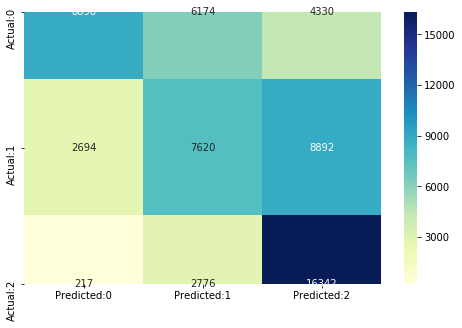

In [108]:
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [108]:
from sklearn import metrics

In [109]:

cols = ['Model','Precision Score', 'Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns = cols)

dt_metrics = pd.Series({'Model': "Decision Tree",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(dt_metrics , ignore_index = True)
result_tabulation


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084


In [110]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.5617383574412262
0.5670492793648054


### Decision tree with grid search 

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [3, 5, 10, 20],
              "min_samples_leaf": [30, 100, 300],
              "max_leaf_nodes": [None,2,3,5],
              }
decision_tree_Gridsearch = DecisionTreeClassifier(random_state=6)
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid=param_grid, cv=10)
decision_tree_Gridsearch.fit(x_train,y_train)
y_pred=decision_tree_Gridsearch.predict(x_test)

In [123]:
import matplotlib.pyplot as plt

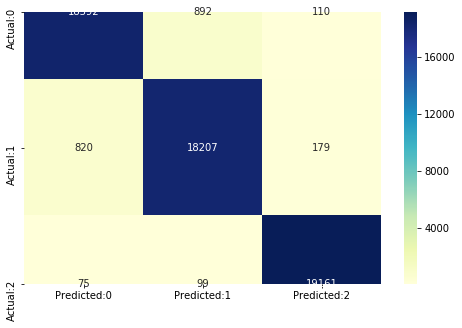

In [124]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19394
           1       0.95      0.95      0.95     19206
           2       0.99      0.99      0.99     19335

    accuracy                           0.96     57935
   macro avg       0.96      0.96      0.96     57935
weighted avg       0.96      0.96      0.96     57935



In [113]:
dt_gc_metrics = pd.Series({'Model': "Decision Tree - Grid search ",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(dt_gc_metrics , ignore_index = True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421


## k-NN 

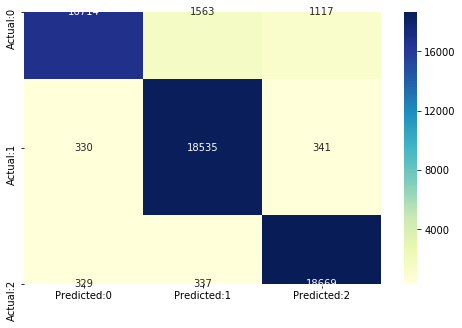

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(x_train, y_train) 
y_pred=knn.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [115]:
knn_metrics = pd.Series({'Model': "k-nn ",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136


In [116]:
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136


## Random forest 

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
cle = RandomForestClassifier(max_depth=4, random_state=6)
cle= cle.fit(x_train,y_train)
y_pred = cle.predict(x_test)

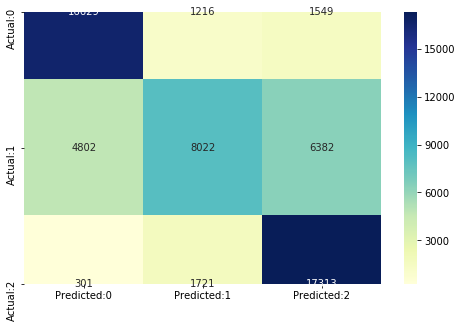

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136
3,random forest,0.727699,0.724329,0.724329,0.706257


In [119]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

rf_metrics = pd.Series({'Model': "random forest",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)
result_tabulation


In [208]:
decision_tree_Gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [209]:
dif=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [210]:
dif= dif.fit(x_train,y_train)
y_pred = dif.predict(x_test)

### Important features 

In [211]:
feature_names = list(x_train.columns)
feature_names

feature_imp = pd.Series(dif.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Credit risk amount      0.111448
Bank Capital Ratio      0.096566
Market risk amount      0.072820
TLE                     0.069600
Country_rank            0.050247
Bank Name_3             0.047734
Country Name_7          0.042028
Country Name_5          0.035442
Period_1                0.025480
Bank Name_2             0.024937
Lended Institution_4    0.023467
NSA Name_1              0.021256
Lended Institution_5    0.020178
Portfolio_0             0.020071
Country Name_6          0.019564
Country Name_4          0.019030
Country Name_2          0.018196
Label_2                 0.017753
Period_2                0.017617
Period_0                0.016885
NSA Name_4              0.016729
Country Name_3          0.016144
Bank Name_8             0.016028
Label_4                 0.015973
Lended Institution_3    0.015700
NSA Name_5              0.015223
Bank Name_4             0.014370
NSA Name_2              0.014107
NSA Name_3              0.013398
Lended Institution_2    0.012744
Bank Name_

No handles with labels found to put in legend.


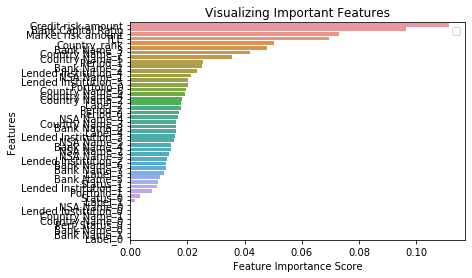

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# ensemble techniques for classification

## bagging

In [122]:
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier

In [123]:
model=BaggingClassifier(max_features=6,random_state=2)
model.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=6, max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=2, verbose=0, warm_start=False)

In [124]:
y_pred=model.predict(x_test)

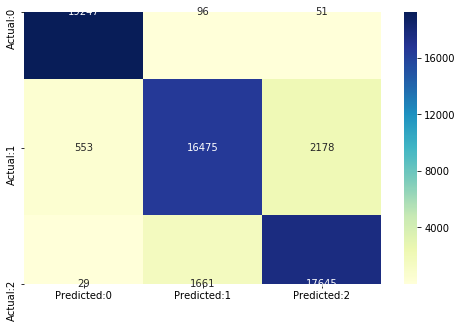

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136
3,random forest,0.727699,0.724329,0.724329,0.706257
4,bagging classifier,0.920797,0.921153,0.921153,0.920680


In [125]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

bagging_metrics = pd.Series({'Model': "bagging classifier",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(bagging_metrics , ignore_index = True)
result_tabulation


In [126]:
print('train score',model.score(x_train,y_train))
print('test score',model.score(x_test,y_test))

train score 0.9865450340042117
test score 0.9211530163113835


## extra tree classifier

In [127]:
model_et=ExtraTreesClassifier(max_depth=4,random_state=6)
model_et.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=4, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=6, verbose=0,
                     warm_start=False)

In [128]:
y_pred=model_et.predict(x_test)

In [129]:
print('train score',model_et.score(x_train,y_train))
print('test score',model_et.score(x_test,y_test))

train score 0.7074861048779646
test score 0.7063605765081556


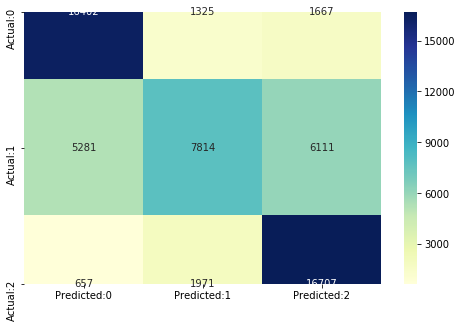

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136
3,random forest,0.727699,0.724329,0.724329,0.706257
4,bagging classifier,0.920797,0.921153,0.921153,0.920680
5,Extra tree classifier,0.706657,0.706361,0.706361,0.688503


In [130]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

extra_tree_metrics = pd.Series({'Model': "Extra tree classifier",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(extra_tree_metrics , ignore_index = True)
result_tabulation

# boosting techniques

## adaboost

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
ada=AdaBoostClassifier(random_state=6)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6)

In [133]:
y_pred=ada.predict(x_test)

In [134]:
print('train score',ada.score(x_train,y_train))
print('test score',ada.score(x_test,y_test))

train score 0.704374805813512
test score 0.7028739104168464


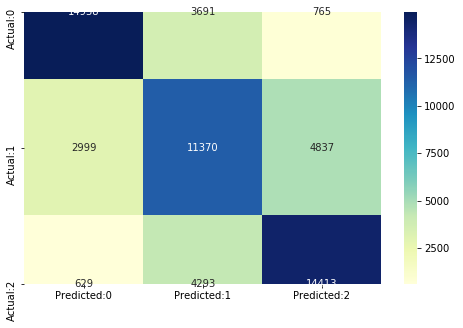

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136
3,random forest,0.727699,0.724329,0.724329,0.706257
4,bagging classifier,0.920797,0.921153,0.921153,0.920680
5,Extra tree classifier,0.706657,0.706361,0.706361,0.688503
6,Ada boost classifier,0.704420,0.702874,0.702874,0.703446


In [135]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

ADABOOST_metrics = pd.Series({'Model': "Ada boost classifier",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(ADABOOST_metrics , ignore_index = True)
result_tabulation

## XGBOOST

In [136]:
from xgboost import XGBClassifier

In [137]:
xg=XGBClassifier(random_state=6)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=6,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [138]:
y_pred=xg.predict(x_test)

In [139]:
print('train score',xg.score(x_train,y_train))
print('test score',xg.score(x_test,y_test))

train score 0.8528239030621052
test score 0.8528350737895918


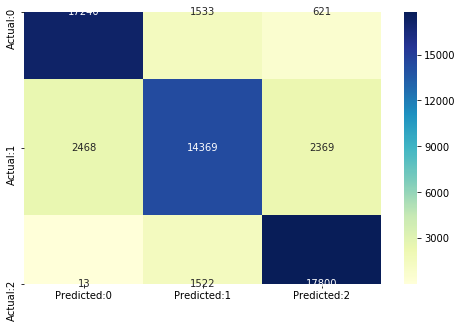

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree,0.589108,0.567049,0.567049,0.555084
1,Decision Tree - Grid search,0.962395,0.962458,0.962458,0.962421
2,k-nn,0.932303,0.930664,0.930664,0.930136
3,random forest,0.727699,0.724329,0.724329,0.706257
4,bagging classifier,0.920797,0.921153,0.921153,0.920680
5,Extra tree classifier,0.706657,0.706361,0.706361,0.688503
6,Ada boost classifier,0.704420,0.702874,0.702874,0.703446
7,Xg BOOST classifier,0.851764,0.852835,0.852835,0.851272


In [140]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

xgboost_metrics = pd.Series({'Model': "Xg BOOST classifier",
                       'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted')})

result_tabulation = result_tabulation.append(xgboost_metrics , ignore_index = True)
result_tabulation

# Regression

In [97]:
cdf1=cdf

In [98]:
cdf1=cdf1.reset_index(drop=True)

In [99]:
cdf1=cdf1.dropna()

In [100]:
X1=cdf1.drop(['Bank Capital Ratio','labels'],axis=1)
y1=cdf1['Bank Capital Ratio']

In [105]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=6)

In [146]:
import statsmodels.api as sm
X_con=sm.add_constant(X1_train)
model=sm.OLS(y1_train,X_con).fit()
model.summary()

/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Bank Capital Ratio   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     229.9
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:23:22   Log-Likelihood:            -1.0750e+05
No. Observations:               78138   AIC:                         2.151e+05
Df Residuals:                   78100   BIC:                         2.154e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Label_0               3.379e-15   2.25e-15      1.499      0.134   -1.04e-15     7.8e-15
Label_1                 -0.0173      0.028     -0.612      0.540      -0.073       0.038
Label_2                 -0.0074      0.017     -0.439      0.660      -0.040       0.026
Label_3                 -0.0028      0.013     -0.219      0.827      -0.027       0.022
Label_4                 -0.0013      0.011     -0.121      0.903      -0.023       0.020
Period_0                -0.1587      0.014    -11.569      0.000      -0.186      -0.132
Period_1                -0.0994      0.010    -10.191      0.000      -0.119      -0.080
Period_2                -0.1057      0.010    -10.943      0.000      -0.125      -0.087
Portfolio_0              0.0966      0.009     10.365      0.000       0.078       0.115
Portfolio_1             -0.0503      0.009     -5.490      0.000      -0.068      -0.032
Country_rank            -0.0529      0.004    -12.859      0.000      -0.061      -0.045
Status_0                 0.0260      0.013      1.951      0.051      -0.000       0.052
Status_1                 0.0202      0.009      2.282      0.022       0.003       0.038
Perf_Status_0            0.0462      0.014      3.347      0.001       0.019       0.073
Credit risk amount   -3.687e-07   1.87e-07     -1.972      0.049   -7.35e-07   -2.25e-09
Bank Name_0          -2.459e-16    5.3e-17     -4.642      0.000    -3.5e-16   -1.42e-16
Bank Name_1           2.578e-16   3.33e-17      7.750      0.000    1.93e-16    3.23e-16
Bank Name_2              0.0459      0.008      6.038      0.000       0.031       0.061
Bank Name_3             -0.0826      0.009     -9.260      0.000      -0.100      -0.065
Bank Name_4              0.1456      0.008     18.372      0.000       0.130       0.161
Bank Name_5             -0.0274      0.007     -3.662      0.000      -0.042      -0.013
Bank Name_6              0.1995      0.008     25.617      0.000       0.184       0.215
Bank Name_7             -0.1012      0.008    -13.455      0.000      -0.116      -0.086
Bank Name_8             -0.0450      0.007     -6.067      0.000      -0.060      -0.030
TLE                     -0.2232      0.009    -23.635      0.000      -0.242      -0.205
Market risk amount       0.4586      0.034     13.515      0.000       0.392       0.525
NSA Name_0           -2.506e-16   1.75e-17    -14.318      0.000   -2.85e-16   -2.16e-16
NSA Name_1               0.0778      0.010      7.813      0.000       0.058       0.097
NSA Name_2              -0.0848      0.009     -9.121      0.000      -0.103      -0.067
NSA Name_3               0.2985      0.008     36.382      0.000       0.282       0.315
NSA Name_4              -0.1968      0.009    -22.460      0.000      -0.214      -0.180
NSA Name_5               0.0759      0.009      8.388    

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])]
vif["features"] = X1_train.columns
vif

/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,NaN,Label_0
1,6.595828,Label_1
2,4.306072,Label_2
3,2.997778,Label_3
4,2.214818,Label_4
5,3.054637,Period_0
6,2.026501,Period_1
7,1.985364,Period_2
8,inf,Portfolio_0
9,inf,Portfolio_1


In [148]:
cdf1=cdf1.drop(['Status_0','Perf_Status_0'],axis=1)

In [149]:
for i in ['Credit risk amount','TLE', 'Market risk amount']:
        for j in range(0,len(cdf1[i])):
                cdf1[i][j]=(cdf1[i][j])**0.99

/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jyotheeswaradhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
cdf1=cdf1.dropna()

In [151]:
X1=cdf1.drop(['Bank Capital Ratio','labels'],axis=1)
y1=cdf1['Bank Capital Ratio']

In [152]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=6)

In [153]:
import statsmodels.api as sm
X_con=sm.add_constant(X1_train)
model=sm.OLS(y1_train,X_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Bank Capital Ratio   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1926.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:24:11   Log-Likelihood:                 6747.4
No. Observations:                7873   AIC:                        -1.343e+04
Df Residuals:                    7843   BIC:                        -1.323e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7871      0.036     77.241      0.000       2.716       2.858
Label_0              -7.047e-10   8.27e-12    -85.246      0.000   -7.21e-10   -6.88e-10
Label_1                 -0.0068      0.011     -0.645      0.519      -0.027       0.014
Label_2                 -0.0046      0.006     -0.760      0.447      -0.016       0.007
Label_3                  0.0020      0.004      0.451      0.652      -0.007       0.011
Label_4                 -0.0005      0.004     -0.138      0.890      -0.007       0.006
Period_0                 0.8665      0.010     88.477      0.000       0.847       0.886
Period_1                 0.2582      0.005     53.885      0.000       0.249       0.268
Period_2                 0.5974      0.006     94.821      0.000       0.585       0.610
Portfolio_0              1.3945      0.018     76.758      0.000       1.359       1.430
Portfolio_1              1.3926      0.018     76.655      0.000       1.357       1.428
Country_rank            -0.0004      0.001     -0.344      0.731      -0.003       0.002
Status_1                -0.0058      0.007     -0.859      0.390      -0.019       0.007
Credit risk amount    1.488e-08   3.81e-08      0.390      0.696   -5.99e-08    8.96e-08
Bank Name_0          -4.561e-14   5.41e-16    -84.378      0.000   -4.67e-14   -4.45e-14
Bank Name_1           4.116e-15   4.89e-17     84.187      0.000    4.02e-15    4.21e-15
Bank Name_2             -0.1663      0.003    -65.564      0.000      -0.171      -0.161
Bank Name_3             -0.6670      0.012    -55.567      0.000      -0.691      -0.644
Bank Name_4              0.2432      0.003     72.301      0.000       0.237       0.250
Bank Name_5             -2.5349      0.029    -85.992      0.000      -2.593      -2.477
Bank Name_6              0.2432      0.003     72.301      0.000       0.237       0.250
Bank Name_7              3.1966      0.038     83.236      0.000       3.121       3.272
Bank Name_8             -0.1663      0.003    -65.564      0.000      -0.171      -0.161
TLE                     -5.9974      0.070    -85.595      0.000      -6.135      -5.860
Market risk amount       2.4032      0.041     58.064      0.000       2.322       2.484
NSA Name_0            -1.78e-15   4.57e-17    -38.913      0.000   -1.87e-15   -1.69e-15
NSA Name_1               0.4185      0.012     34.434      0.000       0.395       0.442
NSA Name_2            1.914e-15   5.09e-17     37.636      0.000    1.81e-15    2.01e-15
NSA Name_3               0.2432      0.003     72.301      0.000       0.237       0.250
NSA Name_4              -0.4238      0.014    -29.840      0.000      -0.452      -0.396
NSA Name_5               2.3686      0.028     85.844      0.000       2.315       2.423
Country Name_0                0          0        nan    

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])]
vif["features"] = X1_train.columns
vif

,VIF Factor,features
0,NaN,Label_0
1,9.186967,Label_1
2,5.336177,Label_2
3,3.312769,Label_3
4,2.140351,Label_4
5,11.809522,Period_0
6,4.258349,Period_1
7,7.353921,Period_2
8,inf,Portfolio_0
9,inf,Portfolio_1


In [155]:
cdf1=cdf1.drop(['Portfolio_0','Lended Institution_0','NSA Name_4','NSA Name_5','Bank Name_4','Bank Name_5','Bank Name_6','Bank Name_7','Bank Name_8'],axis=1)

In [103]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=6)

NameError: name 'train_test_split' is not defined

In [157]:
import statsmodels.api as sm
X_con=sm.add_constant(X1_train)
model=sm.OLS(y1_train,X_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Bank Capital Ratio   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1926.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:24:12   Log-Likelihood:                 6747.4
No. Observations:                7873   AIC:                        -1.343e+04
Df Residuals:                    7843   BIC:                        -1.323e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7871      0.036     77.241      0.000       2.716       2.858
Label_0              -7.047e-10   8.27e-12    -85.246      0.000   -7.21e-10   -6.88e-10
Label_1                 -0.0068      0.011     -0.645      0.519      -0.027       0.014
Label_2                 -0.0046      0.006     -0.760      0.447      -0.016       0.007
Label_3                  0.0020      0.004      0.451      0.652      -0.007       0.011
Label_4                 -0.0005      0.004     -0.138      0.890      -0.007       0.006
Period_0                 0.8665      0.010     88.477      0.000       0.847       0.886
Period_1                 0.2582      0.005     53.885      0.000       0.249       0.268
Period_2                 0.5974      0.006     94.821      0.000       0.585       0.610
Portfolio_0              1.3945      0.018     76.758      0.000       1.359       1.430
Portfolio_1              1.3926      0.018     76.655      0.000       1.357       1.428
Country_rank            -0.0004      0.001     -0.344      0.731      -0.003       0.002
Status_1                -0.0058      0.007     -0.859      0.390      -0.019       0.007
Credit risk amount    1.488e-08   3.81e-08      0.390      0.696   -5.99e-08    8.96e-08
Bank Name_0          -4.561e-14   5.41e-16    -84.378      0.000   -4.67e-14   -4.45e-14
Bank Name_1           4.116e-15   4.89e-17     84.187      0.000    4.02e-15    4.21e-15
Bank Name_2             -0.1663      0.003    -65.564      0.000      -0.171      -0.161
Bank Name_3             -0.6670      0.012    -55.567      0.000      -0.691      -0.644
Bank Name_4              0.2432      0.003     72.301      0.000       0.237       0.250
Bank Name_5             -2.5349      0.029    -85.992      0.000      -2.593      -2.477
Bank Name_6              0.2432      0.003     72.301      0.000       0.237       0.250
Bank Name_7              3.1966      0.038     83.236      0.000       3.121       3.272
Bank Name_8             -0.1663      0.003    -65.564      0.000      -0.171      -0.161
TLE                     -5.9974      0.070    -85.595      0.000      -6.135      -5.860
Market risk amount       2.4032      0.041     58.064      0.000       2.322       2.484
NSA Name_0            -1.78e-15   4.57e-17    -38.913      0.000   -1.87e-15   -1.69e-15
NSA Name_1               0.4185      0.012     34.434      0.000       0.395       0.442
NSA Name_2            1.914e-15   5.09e-17     37.636      0.000    1.81e-15    2.01e-15
NSA Name_3               0.2432      0.003     72.301      0.000       0.237       0.250
NSA Name_4              -0.4238      0.014    -29.840      0.000      -0.452      -0.396
NSA Name_5               2.3686      0.028     85.844      0.000       2.315       2.423
Country Name_0                0          0        nan    

In [158]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])]
vif["features"] = X1_train.columns
vif

,VIF Factor,features
0,NaN,Label_0
1,9.186967,Label_1
2,5.336177,Label_2
3,3.312769,Label_3
4,2.140351,Label_4
5,11.809522,Period_0
6,4.258349,Period_1
7,7.353921,Period_2
8,inf,Portfolio_0
9,inf,Portfolio_1


In [159]:
sm.stats.diagnostic.linear_rainbow(model,frac=0.5)

(0.9980427882449363, 0.5244716923124848)

In [160]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(model.resid,model.model.exog)

(1.0323970670676095, 0.15955130783270155, 'increasing')

In [161]:
X1_test

,Label_0,Label_1,Label_2,Label_3,Label_4,Period_0,Period_1,Period_2,Portfolio_0,Portfolio_1,...,Country Name_4,Country Name_5,Country Name_6,Country Name_7,Lended Institution_0,Lended Institution_1,Lended Institution_2,Lended Institution_3,Lended Institution_4,Lended Institution_5
82520,0,0,1,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
90877,0,0,0,0,1,0,1,0,1,0,...,0,1,1,1,0,0,0,1,0,1
28031,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
83486,0,1,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
29636,0,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90851,0,0,0,0,1,0,1,0,1,0,...,1,1,1,0,0,1,0,0,1,1
83393,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
82417,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
85327,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [162]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X1_train,y1_train)
y1_pred=lm.predict(X1_test)

In [163]:
from sklearn import metrics
cols = ['Model','R-squared','Mean Squared Error','RMSE',]

result_tabulation = pd.DataFrame(columns = cols)

lm_metrics = pd.Series({'Model': "Linear regression",'R-squared train': lm.score(X1_train,y1_train),
                       'R-squared test': metrics.r2_score(y1_test, y1_pred),
                 'Mean Squared Error': metrics.mean_squared_error(y1_test, y1_pred),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),
                 })

result_tabulation = result_tabulation.append(lm_metrics , ignore_index = True)
result_tabulation



,Model,R-squared,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,NaN,0.011237,0.106006,0.876989,0.876877


In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
regr = RandomForestRegressor(max_depth=4,random_state=0)
regr.fit(X1_train, y1_train)
print(regr.feature_importances_)
y_pred=regr.predict(X1_test)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.22784103e-06 3.58963775e-02 1.38109266e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.12249851e-03
 1.43516766e-01 2.57155094e-03 3.38377195e-03 1.47863297e-03
 1.63806721e-03 0.00000000e+00 4.46760624e-01 2.15621341e-01
 0.00000000e+00 2.99723099e-03 0.00000000e+00 2.74378095e-03
 3.15386473e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [166]:
rf_regressor_metrics = pd.Series({'Model': "Random forest regressor ",
                                  'R-squared train': regr.score(X1_train, y1_train),
                       'R-squared test': metrics.r2_score(y1_test, y_pred),
                 'Mean Squared Error': metrics.mean_squared_error(y1_test, y_pred),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, y_pred)),
                 })

result_tabulation = result_tabulation.append(rf_regressor_metrics , ignore_index = True)
result_tabulation



,Model,R-squared,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,NaN,0.011237,0.106006,0.876989,0.876877
1,Random forest regressor,NaN,0.000126,0.011208,0.998625,0.998546


In [167]:
from sklearn.ensemble import BaggingRegressor

In [170]:
model_bag1=BaggingRegressor(max_features=7,random_state=2)
model_bag1.fit(X1_train,y1_train)
y_pred_bag1=model_bag1.predict(X1_test)


bagging_regressor_metrics = pd.Series({'Model': "Bagging regressor ",'R-squared train':
                                       model_bag1.score(X1_train,y1_train),
                       'R-squared test': metrics.r2_score(y1_test, y_pred_bag1),
                 'Mean Squared Error': metrics.mean_squared_error(y1_test, y_pred_bag1),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, y_pred_bag1)),
                 })

result_tabulation = result_tabulation.append(bagging_regressor_metrics , ignore_index = True)
result_tabulation

,Model,R-squared,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,NaN,0.011237,0.106006,0.876989,0.876877
1,Random forest regressor,NaN,0.000126,0.011208,0.998625,0.998546
2,Bagging regressor,NaN,0.019105,0.138219,0.790868,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
3,Bagging regressor,NaN,0.019105,0.138219,0.790868,0.844968


In [171]:
param_grid = {
    'max_features' : [3, 4, 5,6,7],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

Bagging_DT= GridSearchCV(BaggingRegressor(RandomForestRegressor(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)
Bagging_DT.fit(X1_train, y1_train)
best_params = Bagging_DT.best_params_
print(best_params)
y_pred_bag1=Bagging_DT.predict(X1_test)


{'max_features': 7, 'max_samples': 0.5}


In [173]:

bagging_regressor_metrics = pd.Series({'Model': "Bagging regressor with random forest regressor ",
                                       'R-squared train':
                                       Bagging_DT.score(X1_train,y1_train),
                       'R-squared test': metrics.r2_score(y1_test, y_pred_bag1),
                 'Mean Squared Error': metrics.mean_squared_error(y1_test, y_pred_bag1),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, y_pred_bag1)),
                 })

result_tabulation = result_tabulation.append(bagging_regressor_metrics , ignore_index = True)
result_tabulation

,Model,R-squared,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,NaN,0.011237,0.106006,0.876989,0.876877
1,Random forest regressor,NaN,0.000126,0.011208,0.998625,0.998546
2,Bagging regressor,NaN,0.019105,0.138219,0.790868,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
3,Bagging regressor,NaN,0.019105,0.138219,0.790868,0.844968
4,Bagging regressor with random forest regressor,NaN,0.029721,0.172399,0.674649,0.692826


In [107]:
import sklearn.metrics as metrics

In [108]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 4, alpha = 10)
xg_reg.fit(X1_train,y1_train)
preds = xg_reg.predict(X1_test)
r2 = metrics.r2_score(y1_test, preds)
print(r2)
rmse = np.sqrt(metrics.mean_squared_error(y1_test, preds))
print("RMSE: %f" % (rmse))

[16:33:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9416717948928293
RMSE: 0.238818


In [109]:
t=pd.DataFrame(xg_reg.feature_importances_,index=X1_train.columns)
t

,0
Label_0,0.000000
Label_1,0.000000
Label_2,0.000000
Label_3,0.000000
Label_4,0.000305
Period_0,0.005537
Period_1,0.005401
Period_2,0.019030
Portfolio_0,0.009375
Portfolio_1,0.011273


In [177]:

xg_metrics = pd.Series({'Model': "XG boost ",'R-squared train':
                                       xg_reg.score(X1_train,y1_train),
                       'R-squared test': metrics.r2_score(y1_test, preds),
                 'Mean Squared Error': metrics.mean_squared_error(y1_test, preds),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y1_test, preds)),
                 })

result_tabulation = result_tabulation.append(xg_metrics , ignore_index = True)
result_tabulation

,Model,R-squared,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,NaN,0.011237,0.106006,0.876989,0.876877
1,Random forest regressor,NaN,0.000126,0.011208,0.998625,0.998546
2,Bagging regressor,NaN,0.019105,0.138219,0.790868,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
3,Bagging regressor,NaN,0.019105,0.138219,0.790868,0.844968
4,Bagging regressor with random forest regressor,NaN,0.029721,0.172399,0.674649,0.692826
5,XG boost,NaN,0.000004,0.001987,0.999957,"XGBRegressor(alpha=10, base_score=0.5, booster..."
6,XG boost,NaN,0.000004,0.001987,0.999957,0.999959


In [182]:
result_tabulation=result_tabulation.drop('R-squared',axis=1)

In [183]:
result_tabulation=result_tabulation.drop([2,5],axis=0)

In [199]:
result_tabulation.iat[3,0]='Bagging regressor with Grid Search CV'

In [201]:
result_tabulation=result_tabulation.reset_index(drop=True)

In [202]:
result_tabulation

,Model,Mean Squared Error,RMSE,R-squared test,R-squared train
0,Linear regression,0.011237,0.106006,0.876989,0.876877
1,Random forest regressor,0.000126,0.011208,0.998625,0.998546
2,Bagging regressor,0.019105,0.138219,0.790868,0.844968
3,Bagging regressor with Grid Search CV,0.029721,0.172399,0.674649,0.692826
4,XG boost,0.000004,0.001987,0.999957,0.999959
